# Fraud Case Study

7/16 - Guang, Herbert, James, Michael, Stuart

Overview: Provided company data, look for abnormalities in the data and assign it a confidence interval for fraud.

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [11]:
df = pd.read_json('data/data.zip')

df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


## Labelling Fraud

fraudster as fraud, others as non-fraud

In [12]:
def fraud(x):
    if('fraudster' in x):
        return 1
    else:
        return 0
    

df['fraud'] = df['acct_type'].apply(lambda x: fraud(x))

df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


## Drop spammer

only 1 spammer with lots of nans , removed as it might mess with the model

In [13]:
df = df[df['acct_type']!='spammer']

## Create pickle file for team to use

In [14]:
df.to_pickle('data/labelled_dataframe.p')

## Create .py file to automate data creation

In [ ]:
import pandas as pd

def fraud(x):
    if('fraudster' in x):
        return 1
    else:
        return 0

def create_clean_df():
    df = pd.read_json('data/data.zip')
    df['fraud'] = df['acct_type'].apply(lambda x: fraud(x))
    df = df[df['acct_type']!='spammer']
    return df
    
if __name__ == "__main__":
    df = create_clean_df()
    df.to_pickle('data/labelled_dataframe.p')

## Change File Type

In [16]:
df['event_created'] = df['event_created'].apply(lambda x: pd.to_datetime(x, unit='s', errors='ignore'))

df['event_published'] = df['event_published'].apply(lambda x: pd.to_datetime(x, unit='s', errors='ignore'))

df['event_start'] = df['event_start'].apply(lambda x: pd.to_datetime(x, unit='s', errors='ignore'))

df['event_end'] = df['event_end'].apply(lambda x: pd.to_datetime(x, unit='s', errors='ignore'))

df['user_created'] = df['event_end'].apply(lambda x: pd.to_datetime(x, unit='s', errors='ignore'))

## Additional EDA

In [17]:
df['fraud'].value_counts()

0    13043
1     1293
Name: fraud, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14336 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14336 non-null object
approx_payout_date    14336 non-null int64
body_length           14336 non-null int64
channels              14336 non-null int64
country               14255 non-null object
currency              14336 non-null object
delivery_method       14320 non-null float64
description           14336 non-null object
email_domain          14336 non-null object
event_created         14336 non-null datetime64[ns]
event_end             14336 non-null datetime64[ns]
event_published       14237 non-null datetime64[ns]
event_start           14336 non-null datetime64[ns]
fb_published          14336 non-null int64
gts                   14336 non-null float64
has_analytics         14336 non-null int64
has_header            8927 non-null float64
has_logo              14336 non-null int64
listed                14336 non-null object
name                  14336

In [19]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_type,venue_latitude,venue_longitude,fraud
count,1.433600e+04,14336.000000,14336.000000,14320.000000,14336.000000,14336.000000,14336.000000,8927.000000,14336.000000,14336.000000,14336.000000,14336.000000,1.433600e+04,14277.000000,14277.000000,14181.000000,14336.000000,14336.000000,14336.000000,14336.000000,13260.000000,13260.000000,14336.000000
mean,1.350934e+09,3672.341169,6.176339,0.439595,0.127441,2430.387812,0.073033,0.202084,0.842076,41.628139,28.012207,33.755511,4.531444e+06,7.974995,4.307277,46.871377,50.578683,0.844169,374.201869,2.711077,35.220369,-59.494671,0.090193
std,2.401340e+07,5758.273159,3.860257,0.591496,0.333478,9142.607975,0.260200,0.401577,0.364683,23.158453,94.772805,125.182961,1.987694e+06,11.761464,6.011622,54.826820,59.679727,0.362708,418.597787,1.606780,20.207737,66.569700,0.286467
min,1.171256e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.714600e+04,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.000000,-45.045208,-159.390183,0.000000
25%,1.334221e+09,750.000000,5.000000,0.000000,0.000000,116.400000,0.000000,0.000000,1.000000,26.000000,2.000000,0.000000,2.902971e+06,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.000000,33.958663,-96.962604,0.000000
50%,1.355805e+09,1990.000000,6.000000,0.000000,0.000000,432.030000,0.000000,0.000000,1.000000,38.000000,8.000000,2.000000,4.580520e+06,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,3.000000,39.973996,-79.425579,0.000000
75%,1.370646e+09,4278.500000,8.000000,1.000000,0.000000,1547.865000,0.000000,0.000000,1.000000,53.000000,23.000000,13.000000,6.073937e+06,14.000000,11.000000,59.000000,63.000000,1.000000,602.250000,3.000000,44.856732,-3.187513,0.000000
max,1.523488e+09,65535.000000,13.000000,3.000000,1.000000,306293.930000,1.000000,1.000000,1.000000,254.000000,2000.000000,1858.000000,8.792893e+06,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,103.000000,64.844022,176.169492,1.000000


In [20]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
Name: acct_type, dtype: int64

In [21]:
851+437+5

1293

In [22]:
df['description'][0]

'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music

In [23]:
df.delivery_method.value_counts()

0.0    8519
1.0    5554
3.0     247
Name: delivery_method, dtype: int64

In [24]:
df.payout_type.value_counts()

ACH      10665
CHECK     3178
           493
Name: payout_type, dtype: int64

In [25]:
df.ticket_types[0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

## Seasonality charts

based on https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve

''

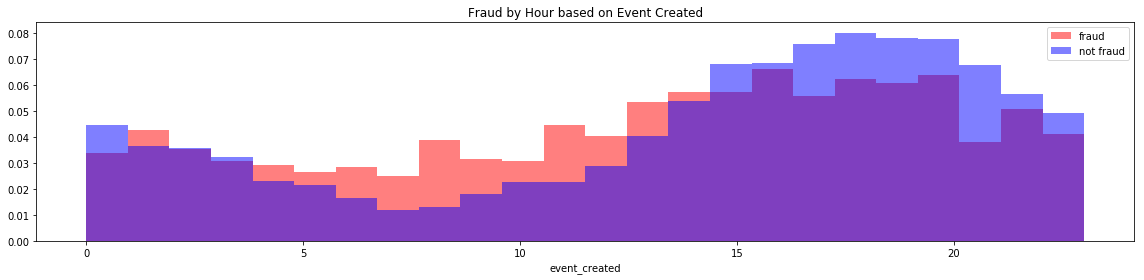

In [26]:
# fraud

fraud_X = df[df['fraud']==1]['event_created'].dt.hour
not_fraud_X = df[df['fraud']==0]['event_created'].dt.hour

bins = 24

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Hour based on Event Created')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_hour_event_created.png', dpi=300)
;

/Users/michaellin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/michaellin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


''

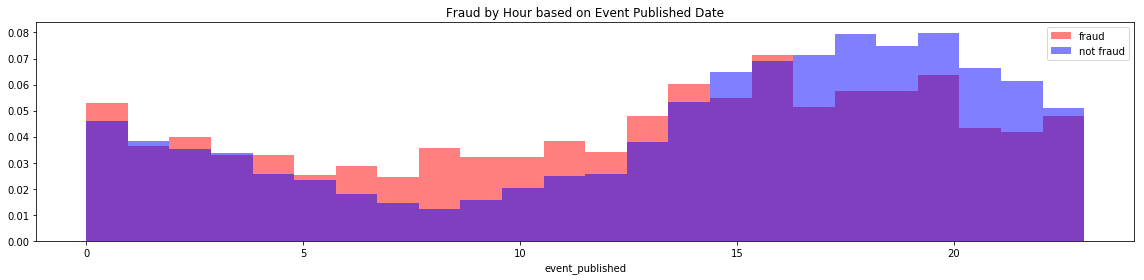

In [27]:
# fraud

fraud_X = df[df['fraud']==1]['event_published'].dt.hour
not_fraud_X = df[df['fraud']==0]['event_published'].dt.hour

bins = 24

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Hour based on Event Published Date')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_hour_event_published.png', dpi=300)
;

''

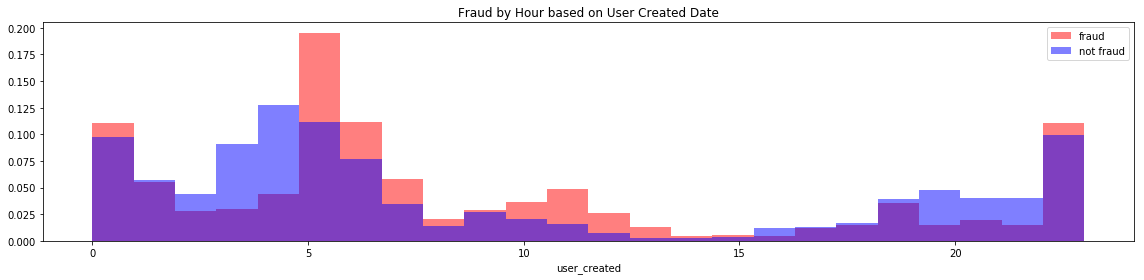

In [28]:
# fraud

fraud_X = df[df['fraud']==1]['user_created'].dt.hour
not_fraud_X = df[df['fraud']==0]['user_created'].dt.hour

bins = 24

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Hour based on User Created Date')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_hour_event_published.png', dpi=300)
;

''

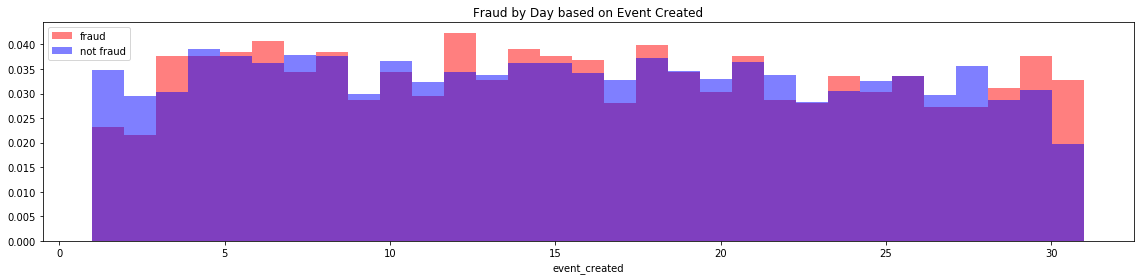

In [29]:
# fraud

fraud_X = df[df['fraud']==1]['event_created'].dt.day
not_fraud_X = df[df['fraud']==0]['event_created'].dt.day

bins = 31

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Day based on Event Created')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_day_event_created.png', dpi=300)
;

''

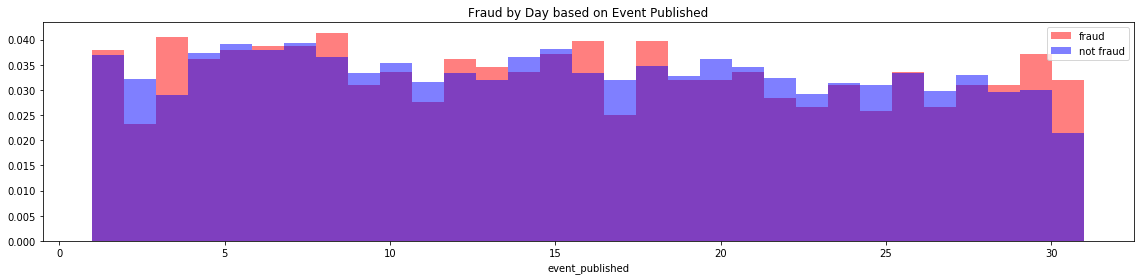

In [30]:
# fraud

fraud_X = df[df['fraud']==1]['event_published'].dt.day
not_fraud_X = df[df['fraud']==0]['event_published'].dt.day

bins = 31

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Day based on Event Published')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_day_event_published.png', dpi=300)
;

''

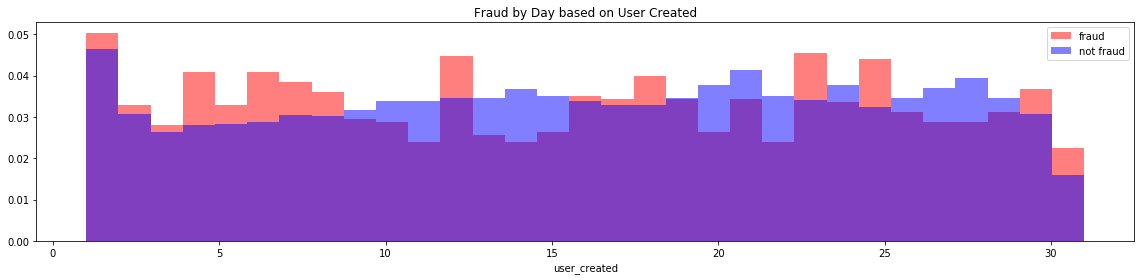

In [31]:
# fraud

fraud_X = df[df['fraud']==1]['user_created'].dt.day
not_fraud_X = df[df['fraud']==0]['user_created'].dt.day

bins = 31

plt.figure(figsize=(16,4))

sns.distplot(fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             hist_kws={'alpha':.5},
             label='fraud')

sns.distplot(not_fraud_X,
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='not fraud')

plt.title('Fraud by Day based on User Created')
plt.legend()
plt.tight_layout()

plt.savefig('img/fraud_by_day_user_created.png', dpi=300)
;